In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
pd.options.display.max_rows=20
pd.options.mode.chained_assignment = 'raise'

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,5

In [4]:
data = pd.read_csv('Modelar_UH2021.txt', sep='|', low_memory=False)

In [5]:
data['fecha']=pd.to_datetime(data['fecha'], format="%d/%m/%Y %H:%M:%S")

In [6]:
data.index=data['fecha']
data.index

DatetimeIndex(['2015-06-01', '2015-06-01', '2015-06-01', '2015-06-01',
               '2015-06-01', '2015-06-01', '2015-06-01', '2015-06-01',
               '2015-06-01', '2015-06-01',
               ...
               '2016-09-30', '2016-09-30', '2016-09-30', '2016-09-30',
               '2016-09-30', '2016-09-30', '2016-09-30', '2016-09-30',
               '2016-09-30', '2016-09-30'],
              dtype='datetime64[ns]', name='fecha', length=4045022, freq=None)

In [7]:
prophet = pd.read_csv('Atmira_Universidad Internacional de Valencia_Heuralia_updated.txt', sep='|', parse_dates=True)
grid = pd.read_csv('Atmira_Universidad Internacional de Valencia_Heuralia_RF2.txt', sep='|', parse_dates=True)

In [8]:
prophet['FECHA']=pd.to_datetime(prophet['FECHA'], format='%d/%m/%Y')
grid['fecha']=pd.to_datetime(grid['fecha'], format='%d/%m/%Y')

In [9]:
prophet

,FECHA,ID,UNIDADES
0,2016-10-01,21972,2
1,2016-10-02,21972,3
2,2016-10-03,21972,1
3,2016-10-04,21972,0
4,2016-10-05,21972,0
...,...,...,...
212836,2016-12-26,458660,9
212837,2016-12-27,458660,8
212838,2016-12-28,458660,9
212839,2016-12-29,458660,6


In [10]:
grid

,fecha,id,unidades_vendidas
0,2016-10-01,21972,6
1,2016-10-02,21972,6
2,2016-10-03,21972,6
3,2016-10-04,21972,6
4,2016-10-05,21972,0
...,...,...,...
212836,2016-12-26,458660,38
212837,2016-12-27,458660,37
212838,2016-12-28,458660,38
212839,2016-12-29,458660,32


In [11]:
prophet.index = prophet[['FECHA','ID']]
prophet.index.is_unique

True

In [12]:
grid.index = grid[['fecha','id']]
grid.index.is_unique

True

In [13]:
pred = pd.merge(left=prophet, how='left', right=grid, left_on=prophet.index, right_on=grid.index)

In [14]:
pred['diff']=pred.loc[:,'UNIDADES']- pred.loc[:,'unidades_vendidas']

In [15]:
pred.describe()

,ID,UNIDADES,id,unidades_vendidas,diff
count,212841.000000,212841.000000,212841.000000,212841.000000,212841.000000
mean,254764.373124,7.296113,254764.373124,16.386829,-9.090716
std,97368.478179,51.367326,97368.478179,78.046433,67.740803
min,21972.000000,0.000000,21972.000000,0.000000,-3727.000000
25%,177232.000000,0.000000,177232.000000,3.000000,-5.000000
50%,264804.000000,1.000000,264804.000000,5.000000,-3.000000
75%,335178.000000,5.000000,335178.000000,9.000000,-1.000000
max,458660.000000,12420.000000,458660.000000,3923.000000,9046.000000


In [16]:
pred.loc[pred['diff']<-3500]

,key_0,FECHA,ID,UNIDADES,fecha,id,unidades_vendidas,diff
77961,"(2016-11-25 00:00:00, 213426)",2016-11-25,213426,394,2016-11-25,213426,3912,-3518
187950,"(2016-11-28 00:00:00, 363178)",2016-11-28,363178,185,2016-11-28,363178,3912,-3727
192209,"(2016-11-28 00:00:00, 372876)",2016-11-28,372876,244,2016-11-28,372876,3897,-3653
192210,"(2016-11-29 00:00:00, 372876)",2016-11-29,372876,277,2016-11-29,372876,3897,-3620
195707,"(2016-11-28 00:00:00, 387606)",2016-11-28,387606,345,2016-11-28,387606,3912,-3567


In [17]:
pred.loc[pred['diff']>2000]

,key_0,FECHA,ID,UNIDADES,fecha,id,unidades_vendidas,diff
98394,"(2016-11-22 00:00:00, 253964)",2016-11-22,253964,2652,2016-11-22,253964,356,2296
153846,"(2016-11-24 00:00:00, 328146)",2016-11-24,328146,2700,2016-11-24,328146,187,2513
153847,"(2016-11-25 00:00:00, 328146)",2016-11-25,328146,4051,2016-11-25,328146,1301,2750
153848,"(2016-11-26 00:00:00, 328146)",2016-11-26,328146,12420,2016-11-26,328146,3374,9046
153849,"(2016-11-27 00:00:00, 328146)",2016-11-27,328146,4276,2016-11-27,328146,1301,2975
153850,"(2016-11-28 00:00:00, 328146)",2016-11-28,328146,3307,2016-11-28,328146,981,2326
153852,"(2016-12-02 00:00:00, 328146)",2016-12-02,328146,3206,2016-12-02,328146,970,2236
153855,"(2016-12-05 00:00:00, 328146)",2016-12-05,328146,2516,2016-12-05,328146,201,2315
153856,"(2016-12-06 00:00:00, 328146)",2016-12-06,328146,4829,2016-12-06,328146,170,4659
153858,"(2016-12-08 00:00:00, 328146)",2016-12-08,328146,2345,2016-12-08,328146,142,2203


In [18]:
pred.index=pred.fecha
pred.index

DatetimeIndex(['2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='fecha', length=212841, freq=None)

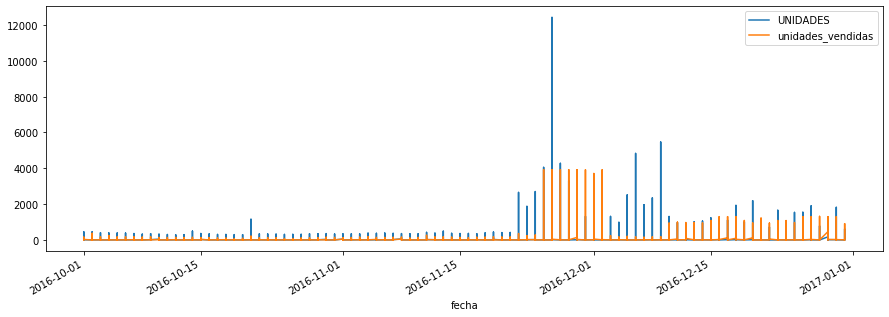

In [19]:
pred.UNIDADES.plot(legend=True)
pred.unidades_vendidas.plot(legend=True)

In [20]:
def plot(code):
    pred_prophet =pred.loc[pred['ID']==code]
    pred_grid = pred.loc[pred['id']==code]
    pred_prophet.UNIDADES.plot(legend=True)
    pred_grid.unidades_vendidas.plot(legend=True)
    data[data['id']==code]['unidades_vendidas'].plot(legend=True)

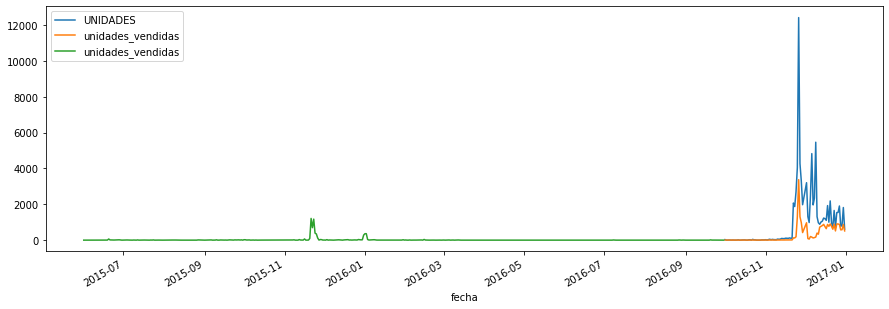

In [21]:
code=328146
plot(code)

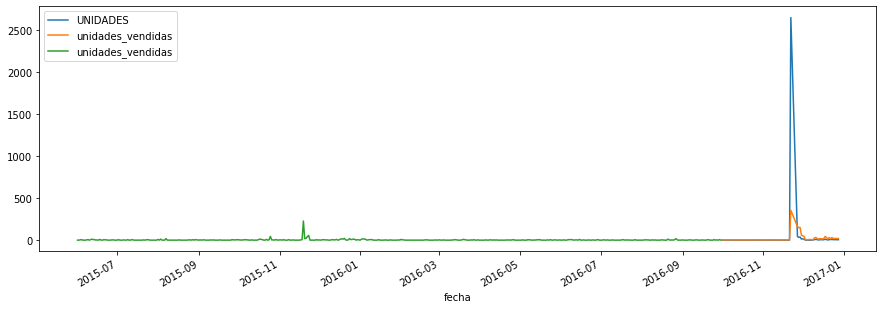

In [22]:
code=253964
plot(code)

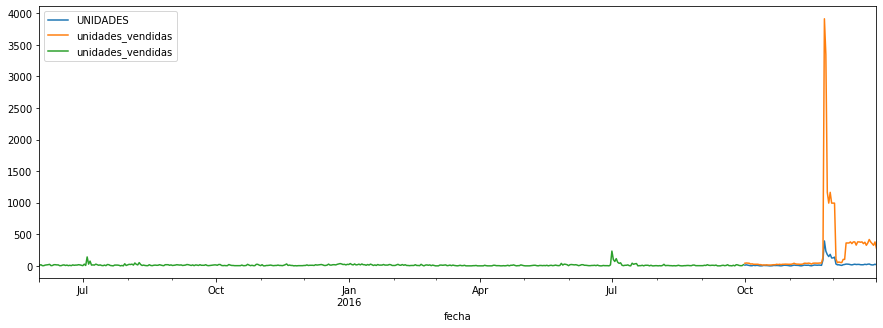

In [23]:
code=213426
plot(code)

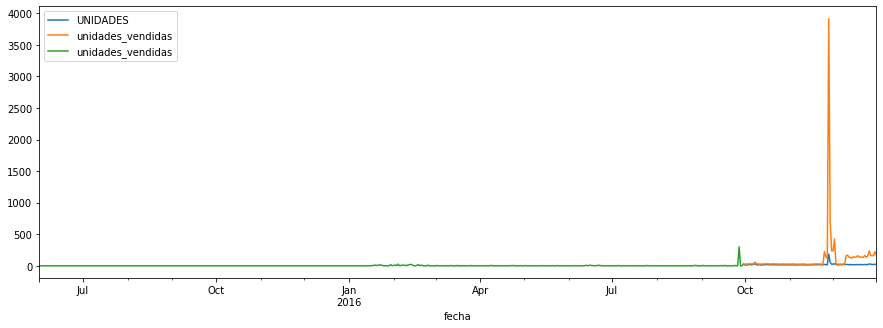

In [24]:
code=363178
plot(code)

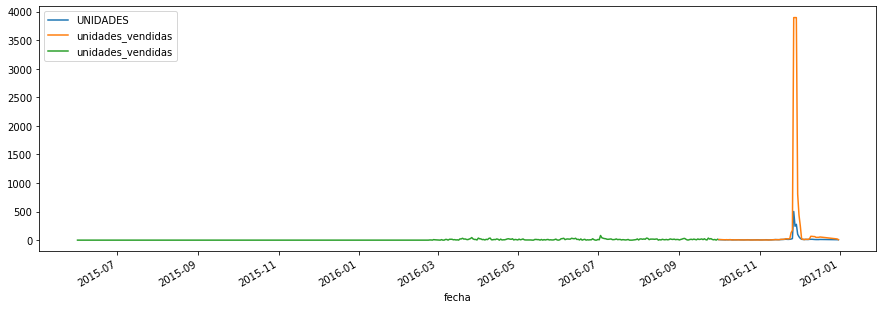

In [25]:
code=372876
plot(code)

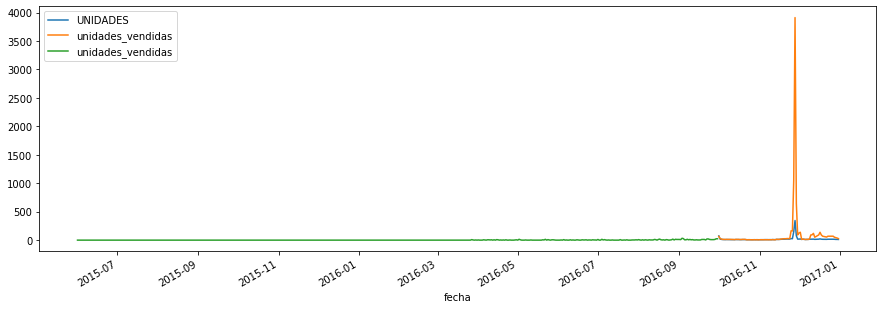

In [26]:
code=387606
plot(code)